In [11]:
import pandas as pd
import numpy as np
from collections import OrderedDict as odict
import xarray as xr
import datashader as ds
import datashader.transfer_functions as tf

In [2]:


num=10000
np.random.seed(1)

dists = {cat: pd.DataFrame(odict([('x',np.random.normal(x,s,num)), 
                                  ('y',np.random.normal(y,s,num)), 
                                  ('val',val), 
                                  ('cat',cat)]))      
         for x,  y,  s,  val, cat in 
         [(  2,  2, 0.03, 10, "d1"), 
          (  2, -2, 0.10, 20, "d2"), 
          ( -2, -2, 0.50, 30, "d3"), 
          ( -2,  2, 1.00, 40, "d4"), 
          (  0,  0, 3.00, 50, "d5")] }

df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")

In [ ]:
df.tail()

In [ ]:
df['x'].min()

CPU times: user 598 ms, sys: 36.8 ms, total: 634 ms
Wall time: 635 ms


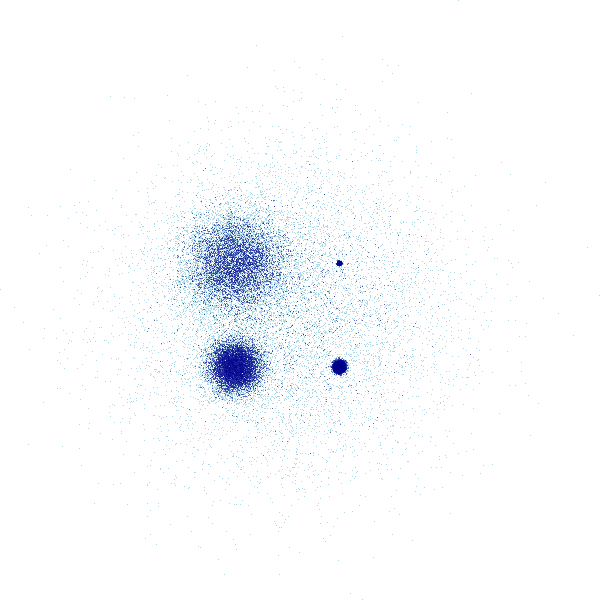

In [3]:


%time tf.shade(ds.Canvas().points(df,'x','y'))

In [12]:
canvas_shot= ds.Canvas(plot_width=300, plot_height=300, 
#                    y_range=(0,647), x_range=(0,5600), 
                   x_axis_type='linear', y_axis_type='linear')

In [13]:

gdata=np.load("gain_data_f64.npy",allow_pickle=True)
times=[t for t in range(0,gdata.shape[0])]
channels=[c for c in range(0,gdata.shape[1])]


xarr_gdata=xr.Dataset(
        {
            'amplitudes':(('time','channels'),gdata)
        },
        {
            "time":times,"channels":channels
        }
    )



In [14]:
xarr_gdata

<xarray.Dataset>
Dimensions:     (channels: 648, time: 5601)
Coordinates:
  * time        (time) int64 0 1 2 3 4 5 6 ... 5595 5596 5597 5598 5599 5600
  * channels    (channels) int64 0 1 2 3 4 5 6 7 ... 641 642 643 644 645 646 647
Data variables:
    amplitudes  (time, channels) float64 0.0 0.0 0.0 ... -9.032e+04 -8.832e+04

In [15]:
shot_raster=canvas_shot.raster(xarr_gdata,agg=ds.mean("amplitudes"))

In [16]:
shot_raster

<xarray.DataArray (time: 300, channels: 300)>
array([[ 9.09150766e+00,  4.99108908e+00,  3.48391196e+00, ...,
         6.83333619e+00,  6.26740642e+00,  6.03907910e+00],
       [ 5.78685331e+01,  3.28646209e+01,  2.31712120e+01, ...,
         4.17939343e+01,  3.87662114e+01,  3.89862586e+01],
       [ 1.28289913e+02,  7.52203048e+01,  5.12931056e+01, ...,
         9.15357387e+01,  8.63104797e+01,  8.74880598e+01],
       ...,
       [ 6.67098562e+04, -6.92277302e+04,  1.44021238e+04, ...,
         2.26472709e+04,  2.66995000e+04,  3.31016209e+04],
       [ 9.99726224e+02, -1.39456551e+05,  1.42634041e+04, ...,
         2.60262152e+04,  2.69308380e+04,  8.24605926e+04],
       [ 9.33559661e+04, -2.35516940e+05,  7.14597372e+04, ...,
        -5.54003549e+04, -1.40969265e+05, -8.14376279e+04]])
Coordinates:
  * channels  (channels) float64 0.58 2.74 4.9 7.06 ... 639.9 642.1 644.3 646.4
  * time      (time) float64 8.835 27.5 46.17 ... 5.554e+03 5.572e+03 5.591e+03
Attributes:
    res:      1.0

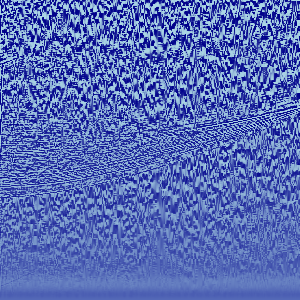

In [18]:
tf.Image(tf.shade(shot_raster))

mean,min,max,mode,std

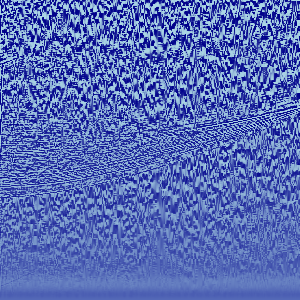
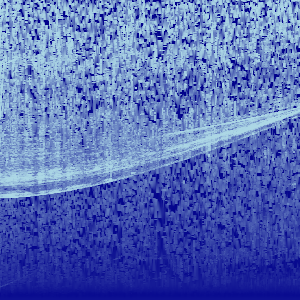
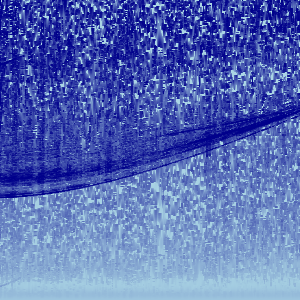
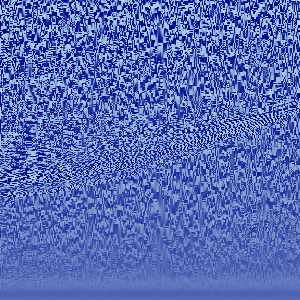
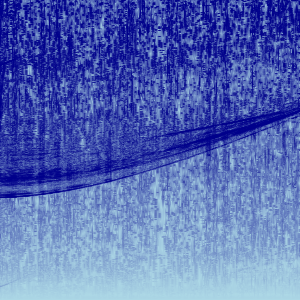

In [19]:
tf.Images(
    tf.shade(canvas_shot.raster(xarr_gdata,agg=ds.mean("amplitudes")) , name="mean"),
    tf.shade(canvas_shot.raster(xarr_gdata,agg=ds.min("amplitudes"))  , name="min"),
    tf.shade(canvas_shot.raster(xarr_gdata,agg=ds.max("amplitudes"))  , name="max"),
    tf.shade(canvas_shot.raster(xarr_gdata,agg=ds.mode("amplitudes")) , name="mode"),
    tf.shade(canvas_shot.raster(xarr_gdata,agg=ds.std("amplitudes"))  , name="std"),
         )